In [1]:
import face_alignment
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
import collections
import numpy as np
import numpy as np
import tensor

In [2]:
# Run the 3D face alignment on a test image, without CUDA.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cpu', flip_input=True)

In [41]:
image_name = './test/02'
input_img = io.imread(image_name+'.jpg')
preds = fa.get_landmarks(input_img)
print(np.array(preds).shape)
preds = preds[-1]
print(np.array(preds).shape)

(1, 68, 2)
(68, 2)


[332.5     443.66666]


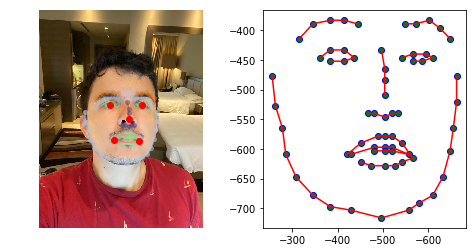

In [42]:
# 2D-Plot
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color, **plot_style)
    
plot_style2 = dict(marker='o',
                  markersize=6,
                  linestyle='-',
                  lw=2) 

pred_left_eye = np.average(np.array(preds[36:42,:]), axis = 0)
pred_right_eye = np.average(np.array(preds[42:48,:]), axis = 0)

print(pred_left_eye)
ax.plot(pred_left_eye[0],pred_left_eye[1], color='red', **plot_style2)
ax.plot(pred_right_eye[0],pred_right_eye[1], color='red', **plot_style2)
ax.plot(preds[30, 0],preds[30, 1], color='red', **plot_style2)
ax.plot(preds[48, 0],preds[48, 1], color='red', **plot_style2)
ax.plot(preds[54, 0],preds[54, 1], color='red', **plot_style2)

file1 = open(image_name+'.txt', 'w')
Lines = [str(preds[38, 0])+'\t'+str(preds[38, 1])+'\n'+
        str(preds[44, 0])+'\t'+str(preds[44, 1])+'\n'+
        str(preds[30, 0])+'\t'+str(preds[30, 1])+'\n'+
        str(preds[48, 0])+'\t'+str(preds[48, 1])+'\n'+
        str(preds[54, 0])+'\t'+str(preds[54, 1])]
file1.writelines(Lines) 
file1.close()


ax.axis('off')

# 3D-Plot
ax = fig.add_subplot(1, 2, 2)
surf = ax.scatter(-preds[:, 0] * 1.2,
                  -preds[:, 1],
                  c='green',
                  alpha=1.0,
                  edgecolor='b')

for pred_type in pred_types.values():
    ax.plot(-preds[pred_type.slice, 0] * 1.2,
              -preds[pred_type.slice, 1], color='red')

#ax.view_init(elev=60., azim=60.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

(1, 68, 3)
(68, 3)


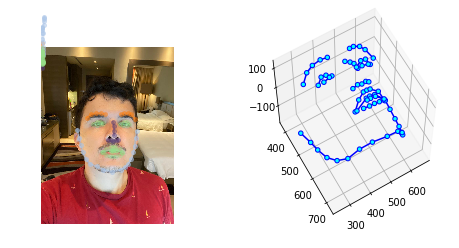

In [44]:
# 3D-Plot
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True)
image_name = './test/02'
input_img = io.imread(image_name+'.jpg')
preds = fa.get_landmarks(input_img)
print(np.array(preds).shape)
preds = preds[-1]
print(np.array(preds).shape)

plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            preds[pred_type.slice, 2],
            color=pred_type.color, **plot_style)

ax.axis('off')

# 3D-Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(preds[:, 0] * 1.2,
                  preds[:, 1],
                  preds[:, 2],
                  c='cyan',
                  alpha=1.0,
                  edgecolor='b')

for pred_type in pred_types.values():
    ax.plot3D(preds[pred_type.slice, 0] * 1.2,
              preds[pred_type.slice, 1],
              preds[pred_type.slice, 2], color='blue')

ax.view_init(elev=60., azim=60.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

In [45]:
print(preds)

[[ 207.         477.        -118.68569  ]
 [ 219.         527.        -113.468376 ]
 [ 226.         565.        -110.05864  ]
 [ 238.         609.        -102.58661  ]
 [ 257.         647.         -81.443726 ]
 [ 282.         678.         -45.20323  ]
 [ 320.         691.          -3.010237 ]
 [ 358.         710.          32.935852 ]
 [ 408.         722.          42.591503 ]
 [ 458.         710.          15.284027 ]
 [ 483.         697.         -31.317928 ]
 [ 502.         678.         -82.49126  ]
 [ 521.         647.        -126.01118  ]
 [ 533.         609.        -151.13531  ]
 [ 540.         571.        -162.03918  ]
 [ 546.         527.        -169.4696   ]
 [ 552.         484.        -176.72063  ]
 [ 263.         408.          21.000082 ]
 [ 288.         389.          41.421352 ]
 [ 314.         383.          54.32652  ]
 [ 345.         383.          62.03103  ]
 [ 370.         389.          64.87665  ]
 [ 458.         389.          52.303703 ]
 [ 477.         383.          42.6